# Using the Experiment class
This is intended to make it easier to create and manage experiments that use the ϕ calculator. An experiment is a network setup (cm,tpm) and calculation of ϕ for all reachable states.

In [1]:
import phial.experiment as ws
import phial.toolbox  as tb
import phial.node_functions as nf
from phial.experiment import Experiment
from phial.utils import tic,toc
tic() # start tracking time of Notebook load

## Create and run an experiment
Results are returned in a dictionary that includes results for every ϕ calculation (state, phi, calc-time) as well as total time for the experiment.

Saved experiment with results to: /home/pothiers/phial/results_2020-05-14T14:48:14.959817.json
CPU times: user 254 ms, sys: 465 ms, total: 719 ms
Wall time: 550 ms


{'timestamp': '2020-05-14 14:48:14.410794',
 'duration': 0.4418718018569052,
 'results': {'000': {'phi': 0.125, 'elapsed_seconds': 0.09382708417251706},
  '101': {'phi': 0.340278, 'elapsed_seconds': 0.09432465396821499},
  '010': {'phi': 0.159722, 'elapsed_seconds': 0.08591571194119751},
  '001': {'phi': 0.125, 'elapsed_seconds': 0.08354965900070965},
  '111': {'phi': 0.375, 'elapsed_seconds': 0.08345702500082552}},
 'filename': None,
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x86_64', processor='x86_64')}

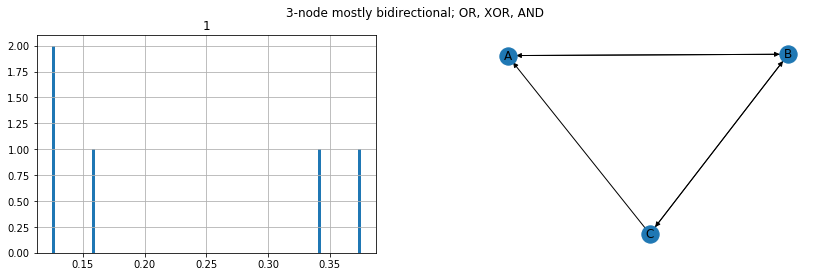

In [2]:
exp = Experiment(
    [('A', 'B'), # ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A=nf.OR_func, B=nf.AND_func, C=nf.XOR_func),
    title='3-node mostly bidirectional; OR, XOR, AND',  
    comment = 'from pyphi/examples.py',
)
%time exp.run(plot=True)

In [3]:
exp.save()

Saved experiment with results to: /home/pothiers/phial/results_2020-05-14T14:48:15.254214.json


PosixPath('/home/pothiers/phial/results_2020-05-14T14:48:15.254214.json')

### Plot again, but also include counts of unreachable states in historgram

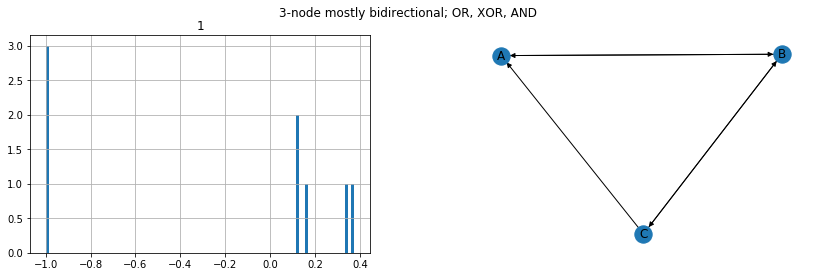

In [4]:
exp.analyze(countUnreachable=True)

## Assign node function from list of all possible functions

In [5]:
gnf = exp.get_num_funcs
gnf

{'A': 16, 'B': 16, 'C': 4}

In [6]:
exp.gen_tpm(dict(A=8, B=12))

,A,B,C
000,0,1,0
100,0,0,0
010,1,1,1
110,1,0,1
001,1,1,0
101,1,1,0
011,0,1,1
111,0,1,1


In [7]:
exp.net.get_node('A').func.true_states

((0, 1), (1, 0))

Saved experiment with results to: /home/pothiers/phial/funcs_AB.json
CPU times: user 301 ms, sys: 538 ms, total: 840 ms
Wall time: 710 ms


{'timestamp': '2020-05-14 14:48:15.641802',
 'duration': 0.5677355141378939,
 'results': {'000': {'phi': 0.1875, 'elapsed_seconds': 0.10155811114236712},
  '101': {'phi': 0.1875, 'elapsed_seconds': 0.09541040007025003},
  '010': {'phi': 0.1875, 'elapsed_seconds': 0.09175224509090185},
  '001': {'phi': 0.125, 'elapsed_seconds': 0.08354965900070965},
  '111': {'phi': 0.1875, 'elapsed_seconds': 0.09105365397408605},
  '110': {'phi': 1.0625, 'elapsed_seconds': 0.096493658144027},
  '011': {'phi': 0.1875, 'elapsed_seconds': 0.09055817499756813}},
 'filename': None,
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x86_64', processor='x86_64')}

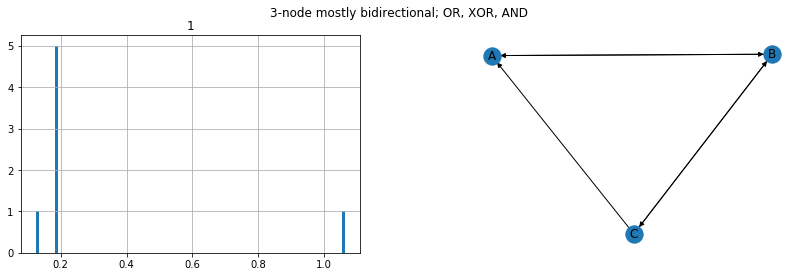

In [8]:
%time exp.run(plot=True,save='funcs_AB')

In [9]:
exp.gen_tpm(dict(A=0,B=0,C=0)) # node funcs never return 1

,A,B,C
000,0,0,0
100,0,0,0
010,0,0,0
110,0,0,0
001,0,0,0
101,0,0,0
011,0,0,0
111,0,0,0


In [10]:
exp.net.get_node('A').func.true_states

()

Saved experiment with results to: /home/pothiers/phial/results_2020-05-14T14:48:16.774679.json
CPU times: user 142 ms, sys: 314 ms, total: 456 ms
Wall time: 147 ms


{'timestamp': '2020-05-14 14:48:16.628465',
 'duration': 0.04786585597321391,
 'results': {'000': {'phi': 0.0, 'elapsed_seconds': 0.04699366609565914},
  '101': {'phi': 0.1875, 'elapsed_seconds': 0.09541040007025003},
  '010': {'phi': 0.1875, 'elapsed_seconds': 0.09175224509090185},
  '001': {'phi': 0.125, 'elapsed_seconds': 0.08354965900070965},
  '111': {'phi': 0.1875, 'elapsed_seconds': 0.09105365397408605},
  '110': {'phi': 1.0625, 'elapsed_seconds': 0.096493658144027},
  '011': {'phi': 0.1875, 'elapsed_seconds': 0.09055817499756813}},
 'filename': None,
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x86_64', processor='x86_64')}

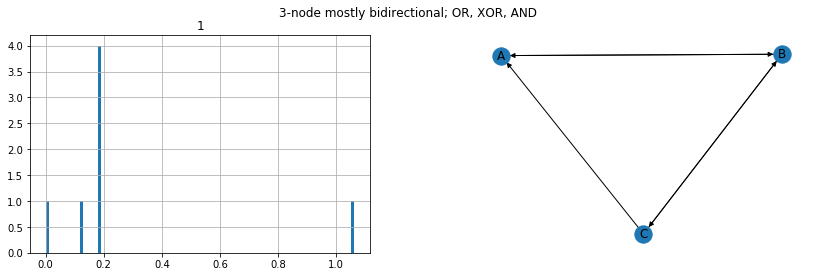

In [11]:
%time exp.run(plot=True)

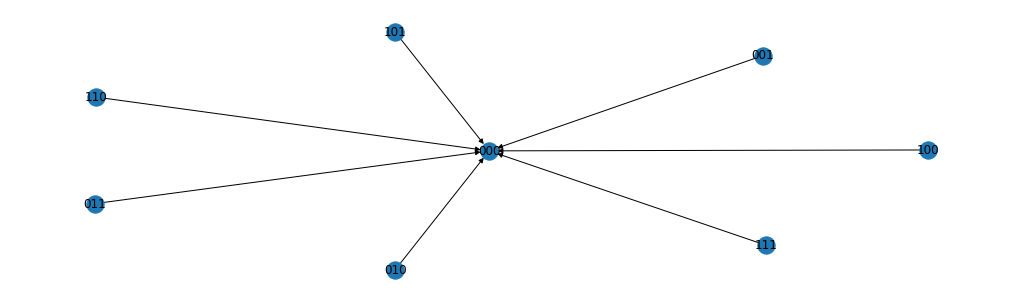

In [12]:
exp.net.draw_states()